<a href="https://colab.research.google.com/github/Naman09746/Spam-mail-prediction/blob/main/Spam_mail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [5]:
data= pd.read_csv('mail.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print(data.shape)
print(data.isnull().sum())

(5572, 2)
Category    0
Message     0
dtype: int64


In [8]:
data.dtypes

Category    object
Message     object
dtype: object

In [9]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [11]:
x= data['Message']
y= data['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [17]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [19]:
#transform text data to feature vectors
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [20]:
y_train= y_train.astype('int')
y_test= y_test.astype('int')

In [21]:
print(x_train_features)

  (0, 3916)	0.6037953148318957
  (0, 3056)	0.3429005562464134
  (0, 4893)	0.6433735801583021
  (0, 3068)	0.32236758935606574
  (1, 5720)	0.6023019309762907
  (1, 6542)	0.5742615392242952
  (1, 3970)	0.2895925989409213
  (1, 6110)	0.4728553638784458
  (2, 53)	0.2275977849591067
  (2, 5502)	0.16144032675968542
  (2, 1582)	0.2275977849591067
  (2, 6557)	0.21161850376233796
  (2, 260)	0.19690190061164803
  (2, 4387)	0.1624258510707269
  (2, 4347)	0.2040320228676743
  (2, 2878)	0.4232962626786592
  (2, 434)	0.2587500279452028
  (2, 2182)	0.27253511506960687
  (2, 4988)	0.1604825674220973
  (2, 1850)	0.21615833183721392
  (2, 453)	0.2587500279452028
  (2, 4630)	0.18805274167090552
  (2, 4587)	0.16079883210369647
  (2, 7099)	0.14954143140130233
  (2, 635)	0.29610087716103933
  :	:
  (4454, 2954)	0.5425177822436338
  (4454, 4823)	0.5172606639045361
  (4454, 3557)	0.5172606639045361
  (4454, 3064)	0.41298579528057155
  (4455, 5046)	0.5672102378436935
  (4455, 5597)	0.5672102378436935
  (4455, 4

In [23]:
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [26]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [27]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9605381165919282


Confusion Matrix:
[[102  43]
 [  1 969]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       145
           1       0.96      1.00      0.98       970

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115


Accuracy Score: 0.9605381165919282
ROC-AUC Score: 0.9948595805190188


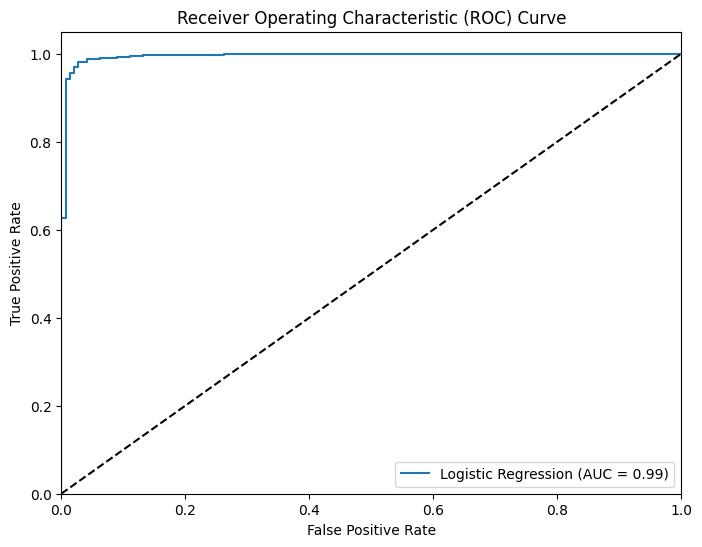

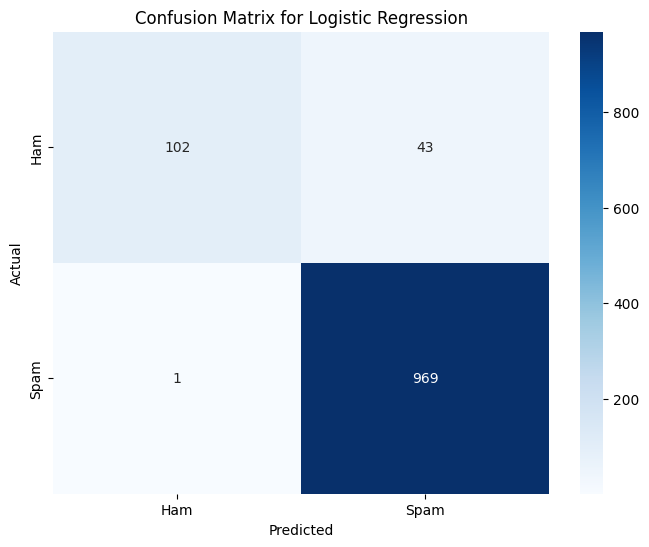

In [38]:
# Make predictions
y_pred = model.predict(x_test_features)
y_pred_prob = model.predict_proba(x_test_features)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [28]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
